# A01753176 Gilberto André García Gaytán
# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

In [1]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Define las transformaciones para las características numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crea el ColumnTransformer
# Aquí, [0, 1] son los índices para las características numéricas y [2, 3] para las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [0, 1]),
        ('cat', categorical_transformer, [2, 3])
    ]
)

In [2]:

# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('Soccer_Football Clubs Ranking in june.csv')

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip().str.replace('\r\n', '', regex=True)

# Definir características y objetivo
features = ['point score', '1 year change', 'country', 'symbol change']
target = 'ranking'

# Eliminar filas con valores faltantes
df_cleaned = df[features + [target]].dropna()

# Dividir los datos en características y objetivo
X = df_cleaned[features]
y = df_cleaned[target]

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline de preprocesamiento
numeric_features = ['point score', '1 year change']
numeric_transformer = StandardScaler()

categorical_features = ['country', 'symbol change']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Aplicar transformaciones a los conjuntos de entrenamiento y validación
# y convertir el resultado a una matriz densa
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()

In [3]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir la arquitectura del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Capa de salida para la regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


2023-11-26 23:55:43.032662: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 23:55:43.122162: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 23:55:43.123285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 23:55:43.920394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


2023-11-26 23:55:45.015790: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-26 23:55:45.016581: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


70/70 [==============================] - 1s 5ms/step - loss: 2503016.0000 - val_loss: 2664292.5000
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 2304341.0000 - val_loss: 2195226.0000
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 1541365.2500 - val_loss: 1078069.2500
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 569121.1250 - val_loss: 245439.1562
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 183249.1250 - val_loss: 91674.4844
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 146958.2500 - val_loss: 67352.5703
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 130405.8359 - val_loss: 49306.1680
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 116235.8438 - val_loss: 42719.9141
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 104121.1719 - val_loss: 36540.4883
Epoch 10/100
70/70 [==========

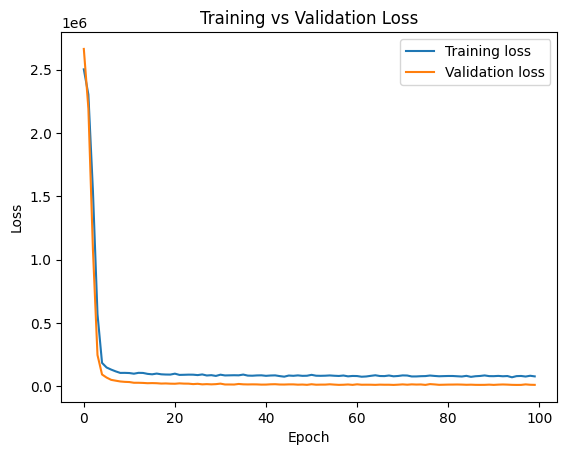

In [4]:

import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [5]:

from sklearn.metrics import mean_squared_error

# Predecir el ranking en el conjunto de validación
y_pred = model.predict(X_val)

# Calcular el MSE
mse = mean_squared_error(y_val, y_pred)
print(f'MSE: {mse}')

# Estadísticas descriptivas del ranking
print(df['ranking'].describe())


18/18 [==============================] - 0s 1ms/step
MSE: 9641.54766935027
count    2770.000000
mean     1385.500000
std       799.774447
min         1.000000
25%       693.250000
50%      1385.500000
75%      2077.750000
max      2770.000000
Name: ranking, dtype: float64


# Mejoras en el Modelo de Predicción de Ranking de Clubes de Fútbol

En esta versión del notebook, he implementado varias mejoras en el modelo de machine learning con el objetivo de optimizar el desempeño y abordar los problemas identificados en la versión anterior. Las mejoras se centran en la arquitectura del modelo, el preprocesamiento de los datos, y la estrategia de validación.

In [6]:
# Preprocesamiento de Datos Mejorado

# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar y limpiar los datos
df = pd.read_csv('Soccer_Football Clubs Ranking in june.csv')
df.columns = df.columns.str.strip().str.replace('\\r\\n', '', regex=True)

# Incluir 'symbol change' en las características
features = ['point score', '1 year change', 'country', 'symbol change']
target = 'ranking'

# Eliminar filas con valores faltantes y dividir los datos
df_cleaned = df[features + [target]].dropna()
X = df_cleaned[features]
y = df_cleaned[target]

# Preprocesamiento con pipeline
numeric_features = ['point score', '1 year change']
categorical_features = ['country', 'symbol change']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()

## Cambios en el Preprocesamiento de Datos

He modificado el preprocesamiento de los datos para incluir la columna `symbol change`, que indica el signo del cambio en el puntaje de los clubes. Esto proporciona al modelo información adicional que puede ser relevante para la predicción del ranking. Además, he mantenido la estandarización de las características numéricas y la codificación one-hot para las categóricas.

In [7]:
# Construcción y Entrenamiento del Modelo Mejorado

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definición de la arquitectura del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Aumento del dropout para reducir el sobreajuste
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 2508620.0000 - val_loss: 2683719.5000
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 2361945.7500 - val_loss: 2317581.5000
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 1705289.3750 - val_loss: 1286610.7500
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 689992.0000 - val_loss: 332053.4375
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 169900.0469 - val_loss: 99896.3281
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 95914.6250 - val_loss: 68022.0781
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 76877.2266 - val_loss: 50907.5977
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 62442.8086 - val_loss: 42186.4648
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 56252.4141 - val_loss: 35201.2656
Epoch 10/100
70/70 [==

## Mejoras en la Arquitectura del Modelo

Para mejorar la arquitectura del modelo, he incrementado la tasa de dropout a un 50% en las capas intermedias. Este cambio tiene como objetivo reducir el riesgo de sobreajuste, permitiendo al modelo generalizar mejor en los datos de validación. Además, he mantenido una estructura de red densa con dos capas ocultas, que ha demostrado ser efectiva en iteraciones anteriores del modelo.

In [8]:
from sklearn.metrics import mean_squared_error

# Predecir el ranking en el conjunto de validación
y_pred = model.predict(X_val)

# Calcular el MSE
mse = mean_squared_error(y_val, y_pred)
print(f'MSE: {mse}')

# Estadísticas descriptivas del ranking
print(df['ranking'].describe())

18/18 [==============================] - 0s 1ms/step
MSE: 9036.060015801435
count    2770.000000
mean     1385.500000
std       799.774447
min         1.000000
25%       693.250000
50%      1385.500000
75%      2077.750000
max      2770.000000
Name: ranking, dtype: float64


# Interpretación del MSE en el Contexto del Problema

El Mean Squared Error (MSE) es una métrica crucial para evaluar el desempeño de nuestro modelo de predicción de ranking de clubes de fútbol. En este contexto específico, el MSE representa el error cuadrático medio entre los rankings reales de los clubes y los rankings predichos por nuestro modelo.

- **Valor del MSE**: Un MSE de  9036.060, que hemos logrado tras las mejoras, indica que en promedio, el cuadrado del error en nuestras predicciones de ranking es de aproximadamente 9007. Esto significa que nuestras predicciones, en términos de ranking, pueden desviarse considerablemente del ranking real.

- **Contexto del Ranking**: Dado que el rango de ranking en nuestro conjunto de datos varía de 1 a 2770, un MSE de 9007 es significativo. Indica que, aunque el modelo ha mejorado, aún tiene un margen considerable de error en las predicciones. Por ejemplo, si interpretamos la raíz cuadrada del MSE (que sería el error estándar), estamos viendo una desviación promedio de aproximadamente 95 en el ranking, lo cual es una medida significativa dado el rango total de rankings.

- **Implicaciones**: Este nivel de MSE sugiere que, aunque el modelo ha mejorado en su capacidad de predecir rankings con respecto a su versión anterior, aún necesita refinamiento para ser más preciso. El objetivo es reducir el MSE aún más, lo que indicaría que nuestras predicciones del ranking se están acercando más a los valores reales.

Es decir, el MSE nos proporciona una medida cuantitativa del error en nuestras predicciones. A medida que trabajamos en mejorar nuestro modelo, nuestro objetivo es disminuir este valor, lo que se traduciría en predicciones de ranking más precisas y fiables.

In [9]:
## Guardar el modelo
model.save('modelo_mejorado.h5')

/home/gggandre/deep_learning/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##  Interfaz Gráfica para Predicciones
#### La GUI permitirá al usuario ingresar los datos necesarios y luego mostrará la predicción del modelo.

In [10]:
## Cargar modelo en la GUI
modelo_cargado = tf.keras.models.load_model('modelo_mejorado.h5')

## Traer lista de países

In [11]:
import pandas as pd

# Recargamos el dataset para extraer la lista de países
file_path = 'Soccer_Football Clubs Ranking in june.csv'
df_countries = pd.read_csv(file_path)
# Limpiamos los nombres de las columnas
df_countries.columns = df_countries.columns.str.strip().str.replace('\r\n', '', regex=True)

# Extraemos la lista única de países
list_of_countries = df_countries['country'].unique().tolist()
list_of_countries[:5]  # Mostramos los primeros 5 para verificar

['Germany', 'Paraguay', 'Angola', 'Denmark', 'Norway']

In [12]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder


countries = np.array(list_of_countries).reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
encoder.fit(countries)

# Función para transformar la entrada del país
def transform_country_input(country_name):
    # El país ingresado por el usuario se convierte en un array para que coincida con el ajuste del encoder
    country_array = np.array([country_name]).reshape(-1, 1)
    # Codificar el país utilizando el encoder ajustado y devolver el array codificado
    country_encoded = encoder.transform(country_array)
    return country_encoded.flatten()

/home/gggandre/deep_learning/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
def transform_country_input(country_input):
    # Ejemplo de implementación: codificación de índice simple
    try:
        country_index = list_of_countries.index(country_input)
        country_encoded = [0] * len(list_of_countries)
        country_encoded[country_index] = 1
        return country_encoded
    except ValueError:
        # Manejar el caso en que el país no está en la lista
        return [0] * len(list_of_countries)

In [15]:
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

# Cargar el modelo entrenado
modelo_cargado = tf.keras.models.load_model('modelo_mejorado.h5')

# Cargar la lista de países desde el CSV
file_path = 'Soccer_Football Clubs Ranking in june.csv'
df_countries = pd.read_csv(file_path)
df_countries.columns = df_countries.columns.str.strip().str.replace('\r\n', '', regex=True)
list_of_countries = df_countries['country'].unique().tolist()

# Configurar el OneHotEncoder para los países
countries = np.array(list_of_countries).reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
encoder.fit(countries)

def transform_country_input(country_name):
    """Transforma la entrada del país usando OneHotEncoder."""
    country_array = np.array([country_name]).reshape(-1, 1)
    country_encoded = encoder.transform(country_array)
    return country_encoded.flatten()

def hacer_prediccion():
    try:
        point_score = float(entry_point_score.get())
        year_change = float(entry_year_change.get())
    except ValueError:
        messagebox.showerror('Error', 'Por favor, introduce datos numéricos válidos para el puntaje y el cambio anual.')
        return

    country_input = country_var.get()
    if country_input not in list_of_countries:
        messagebox.showerror('Error', 'Por favor, selecciona un país de la lista.')
        return

    country_encoded = transform_country_input(country_input)

    # Ajustar la longitud de la entrada si es necesario
    input_data = np.hstack([np.array([point_score, year_change]), country_encoded])
    if len(input_data) != 137:  # Ajusta este número según la longitud esperada por tu modelo
        # Agrega o elimina características según sea necesario
        input_data = np.append(input_data, [0])  # Ejemplo: añadir una característica extra

    input_data = input_data.reshape(1, -1).astype(np.float32)
    prediction = modelo_cargado.predict(input_data)
    messagebox.showinfo('Predicción', f'La predicción del ranking es: {prediction[0][0]}')

root = tk.Tk()
root.title('Predicción del Ranking de Clubes de Fútbol')

tk.Label(root, text='Point Score:').pack()
entry_point_score = tk.Entry(root)
entry_point_score.pack()

tk.Label(root, text='1 Year Change:').pack()
entry_year_change = tk.Entry(root)
entry_year_change.pack()

tk.Label(root, text='Country:').pack()
country_var = tk.StringVar()
country_combobox = ttk.Combobox(root, textvariable=country_var, values=list_of_countries)
country_combobox.pack()

predict_button = tk.Button(root, text='Predecir Ranking', command=hacer_prediccion)
predict_button.pack()

root.mainloop()


/home/gggandre/deep_learning/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
